In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
import os
# check the current path
print(os.getcwd()) # /content

# You should copy the path : 왼쪽 폴더에서 오른쪽 버튼 후 경로복사
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/2024_OSP_SW')

print(os.getcwd()) # path has been changed

/content
/content/gdrive/MyDrive/Colab Notebooks/2024_OSP_SW


In [3]:
# 라이브러리 설치
!pip install efficientnet-pytorch
!pip install albumentations
!pip install timm
!pip install scikit-learn matplotlib

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16424 sha256=f9c7046c553f580c353a40e34e27fca8e02e38915b4ccdb3028f255297d92433
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet-pytorch


In [4]:
!pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 torchaudio==2.0.2+cu118 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 118.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 107.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu121
    Uninstalling torch-2.5.1+cu121:
      Successfully uninstalled torch-2.5.1+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.20.1+cu121
    Uninstalling torchvision-0.20.1+cu121:
      Successfully uninstalled torchvision-0.20.1+cu121
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.5.1+cu121
    Uninstalling torchaudio-2.5.1+cu121:
      Successfully uninstalled torchaudio-2.5

In [5]:
!pip install facenet-pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 113.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [3]:
import pandas as pd
import json

# JSON 파일 경로
json_file = "/content/gdrive/MyDrive/Colab Notebooks/2024_OSP_SW/dfdc_train_part_0/metadata.json"

# JSON 파일 로드
with open(json_file, "r") as f:
    metadata = json.load(f)

# JSON 데이터를 데이터프레임으로 변환
df = pd.DataFrame.from_dict(metadata, orient="index").reset_index()
df.columns = ["filename", "label", "split", "original"]

# 라벨링을 0과 1로 매핑
df["label"] = df["label"].map({"FAKE": 0, "REAL": 1})

# 데이터프레임에서 필요한 컬럼만 출력하도록 정리
print(df[["filename", "label", "split", "original"]].head(10))

         filename  label  split        original
0  owxbbpjpch.mp4      0  train  wynotylpnm.mp4
1  vpmyeepbep.mp4      1  train             NaN
2  fzvpbrzssi.mp4      1  train             NaN
3  htorvhbcae.mp4      0  train  wclvkepakb.mp4
4  fckxaqjbxk.mp4      0  train  vpmyeepbep.mp4
5  sphirandia.mp4      0  train  jawgcggquk.mp4
6  vsmadeuczx.mp4      0  train  qarqtkvgby.mp4
7  ohaqlzfnuv.mp4      0  train  sttnfyptum.mp4
8  komngcqveq.mp4      0  train  kqlvggiqee.mp4
9  iafvzgpbix.mp4      0  train  lzbmwwejxb.mp4


In [ ]:
import pandas as pd
import json

# JSON 파일 경로
json_file = "/content/gdrive/MyDrive/Colab Notebooks/2024_OSP_SW/dfdc_train_part_0/metadata.json"

# JSON 파일 로드
with open(json_file, "r") as f:
    metadata = json.load(f)

# JSON 데이터를 데이터프레임으로 변환
df = pd.DataFrame.from_dict(metadata, orient="index").reset_index()
df.columns = ["filename", "label", "split", "original"]

# 라벨링을 0과 1로 매핑
df["label"] = df["label"].map({"FAKE": 0, "REAL": 1})

# REAL과 FAKE의 개수 확인
real_count = (df["label"] == 1).sum()
fake_count = (df["label"] == 0).sum()

print(f"REAL videos: {real_count}")
print(f"FAKE videos: {fake_count}")

In [4]:
import os
import cv2
from facenet_pytorch import MTCNN
from multiprocessing import Pool
from PIL import Image
from tqdm import tqdm

# MTCNN 모델 초기화
mtcnn = MTCNN(keep_all=False)

# 경로 설정
input_dir = "/content/gdrive/MyDrive/Colab Notebooks/2024_OSP_SW/dfdc_train_part_0"
output_dir = "/content/gdrive/MyDrive/Colab Notebooks/2024_OSP_SW/processed_videos"

os.makedirs(output_dir, exist_ok=True)

# 스킵된 비디오 목록 저장
skipped_videos = []

# 비디오 처리 함수
def process_video(video_info):
    video_path, output_path = video_info
    if not os.path.exists(video_path):
        return output_path

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Skipping invalid video: {video_path}")
        skipped_videos.append(video_path)
        return None

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        box, _ = mtcnn.detect(Image.fromarray(rgb_frame))
        if box is not None:
            x1, y1, x2, y2 = map(int, box[0])

            if x1 < 0 or y1 < 0 or x2 < 0 or y2 < 0:
                continue
            cropped_face = frame[y1:y2, x1:x2]

            cropped_face_resized = cv2.resize(cropped_face, (224, 224))
            cv2.imwrite(output_path, cropped_face_resized)
            break

    cap.release()

    return output_path

video_info_list = [
    (os.path.join(input_dir, filename), os.path.join(output_dir, f"{os.path.splitext(filename)[0]}.jpg"))
    for filename in os.listdir(input_dir) if filename.endswith(".mp4")
]

print("Starting optimized video processing...")
for i in tqdm(video_info_list):
    process_video(i)
print("Processing complete.")

Starting optimized video processing...


100%|██████████| 1334/1334 [46:40<00:00,  2.10s/it]

Processing complete.


In [5]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

json_file = os.path.join(input_dir, 'metadata.json')

with open(json_file, "r") as f:
    metadata = json.load(f)

name, label = [], []
c2l = {"FAKE": 0, "REAL": 1}
for k ,v in metadata.items():
    name.append(k.replace('.mp4', '.jpg'))
    label.append(c2l[v['label']])

df = pd.DataFrame({'name':name, 'label':label})

df_label_1 = df[df['label'] == 1]
df_label_0 = df[df['label'] == 0]

n_samples = len(df_label_1)
df_label_0_sampled = resample(df_label_0,
                              replace=False,  # 복원 추출 여부
                              n_samples=n_samples,  # 샘플링 개수
                              random_state=42)  # 재현성을 위한 random state 설정

df_balanced = pd.concat([df_label_1, df_label_0_sampled])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

train_df, test_df = train_test_split(df_balanced, test_size=0.2, random_state=42)

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]

Training EfficientNet-B0...
Epoch 1/10 - Train Loss: 0.6779
Epoch 2/10 - Train Loss: 0.5407
Epoch 3/10 - Train Loss: 0.4327
Epoch 4/10 - Train Loss: 0.3236
Epoch 5/10 - Train Loss: 0.2189
Epoch 6/10 - Train Loss: 0.1782
Epoch 7/10 - Train Loss: 0.1115
Epoch 8/10 - Train Loss: 0.0752
Epoch 9/10 - Train Loss: 0.0508
Epoch 10/10 - Train Loss: 0.0488


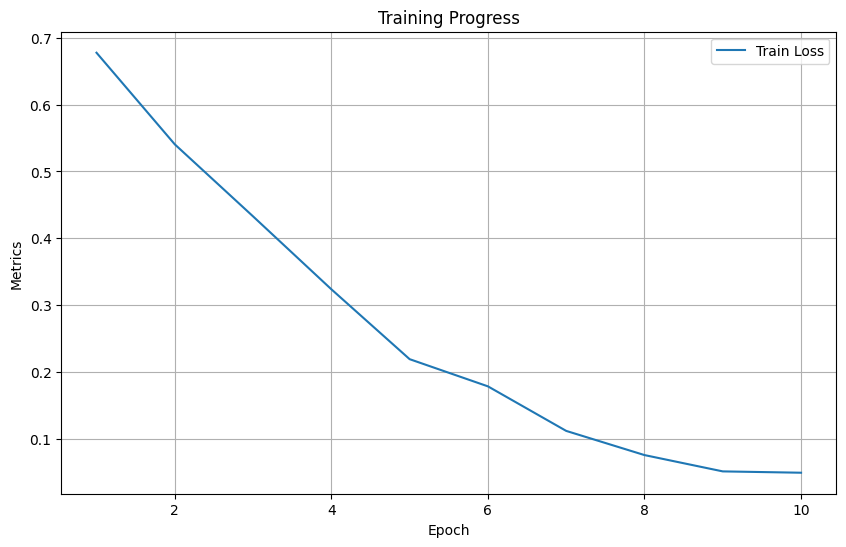

Training ConvNextTiny...
Epoch 1/10 - Train Loss: 0.7744
Epoch 2/10 - Train Loss: 0.7301
Epoch 3/10 - Train Loss: 0.6983
Epoch 4/10 - Train Loss: 0.6984
Epoch 5/10 - Train Loss: 0.7001
Epoch 6/10 - Train Loss: 0.7070
Epoch 7/10 - Train Loss: 0.6957
Epoch 8/10 - Train Loss: 0.6964
Epoch 9/10 - Train Loss: 0.6996
Epoch 10/10 - Train Loss: 0.7031


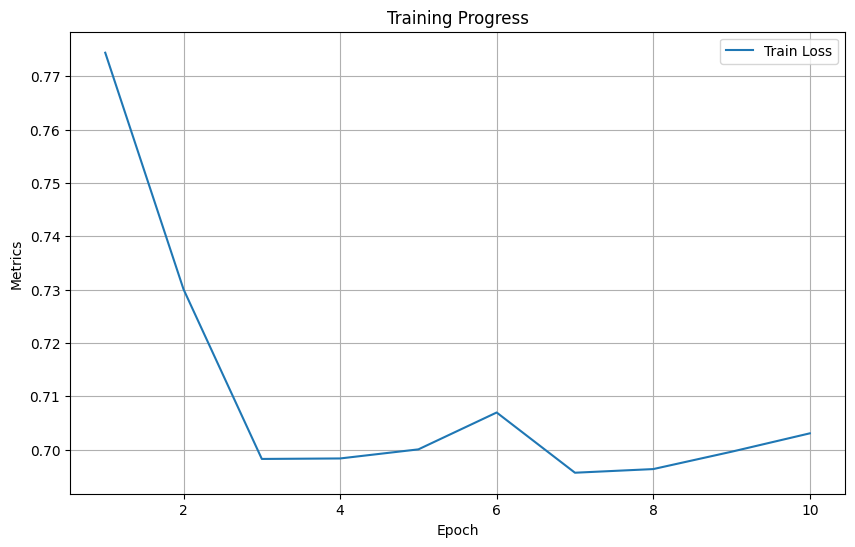

In [6]:
from timm import create_model
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt
from facenet_pytorch import MTCNN
import numpy as np

class ProcessedDataset(Dataset):
    def __init__(self, df, transform=None):
        self.img_name = df['name']
        self.labels = df['label']
        self.transform = transform

    def __len__(self):
        return len(self.img_name)

    def __getitem__(self, idx):
        img_name = self.img_name[idx]
        label = self.labels[idx]
        img_path = os.path.join('./processed_videos', img_name)

        image = Image.open(img_path)

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.float32)


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 데이터셋 및 DataLoader 생성
train_dataset = ProcessedDataset(train_df, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

class CustomEfficientNetB0(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomEfficientNetB0, self).__init__()
        self.backbone = create_model("efficientnet_b0", pretrained=pretrained)
        self.backbone.reset_classifier(0)  # 기존 FC 레이어 제거
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])  # GAP
        x = self.fc(x)
        return x

# ConvNextTiny 모델 정의
class CustomConvNextTiny(nn.Module):
    def __init__(self, pretrained=True, num_classes=1):
        super(CustomConvNextTiny, self).__init__()
        self.backbone = create_model("convnext_tiny", pretrained=pretrained)
        self.backbone.reset_classifier(0)  # 기존 FC 레이어 제거
        self.dropout = nn.Dropout(p=0.3)
        self.fc = nn.Linear(768, num_classes)

    def forward(self, x):
        x = self.backbone.forward_features(x)
        x = self.dropout(x)
        x = x.mean(dim=[2, 3])  # GAP
        x = self.fc(x)
        return x

# 모델 초기화
efficientnet_b0 = CustomEfficientNetB0(pretrained=True).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
convnext_tiny = CustomConvNextTiny(pretrained=True).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

# 손실 함수 및 옵티마이저 정의
criterion = nn.BCEWithLogitsLoss()

# EfficientNet-B0 옵티마이저와 스케줄러
optimizer_efficientnet = optim.Adam(efficientnet_b0.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler_efficientnet = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_efficientnet, mode="min", factor=0.5, patience=2)

# ConvNextTiny 옵티마이저와 스케줄러
optimizer_convnext = optim.Adam(convnext_tiny.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler_convnext = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_convnext, mode="min", factor=0.5, patience=2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
def train(model, optimizer, scheduler, train_loader, num_epochs=10):
    train_losses = []

    for epoch in range(num_epochs):
        # 학습 단계
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}")

    # 결과 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
    plt.title("Training Progress")
    plt.xlabel("Epoch")
    plt.ylabel("Metrics")
    plt.legend()
    plt.grid()
    plt.show()

def evaluate_model(model, val_loader):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            predictions = torch.round(torch.sigmoid(outputs))
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    return val_loss / len(val_loader), accuracy

# EfficientNet-B0 학습 호출
print("Training EfficientNet-B0...")
train(efficientnet_b0, optimizer_efficientnet, scheduler_efficientnet, train_loader, num_epochs=10)

# ConvNextTiny 학습 호출
print("Training ConvNextTiny...")
train(convnext_tiny, optimizer_convnext, scheduler_convnext, train_loader, num_epochs=10)

# 5. Test Code

Testing EfficientNet-B0...
EfficientNet-B0 Test Metrics:
Loss: 0.46
Accuracy (%): 71.43
Precision (%): 75.00
Recall (%): 66.67
F1 Score (%): 70.59


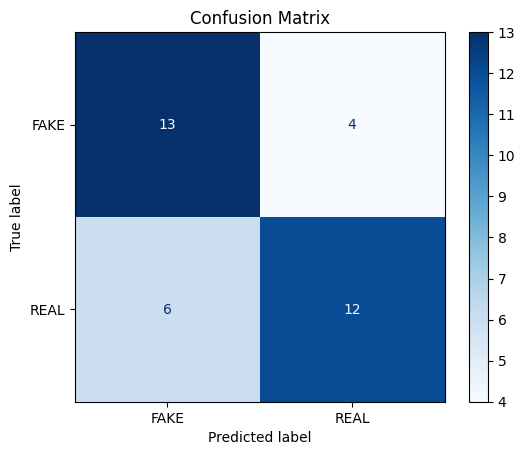


Testing ConvNext Tiny...
ConvNext Tiny Test Metrics:
Loss: 0.69
Accuracy (%): 48.57
Precision (%): 0.00
Recall (%): 0.00
F1 Score (%): 0.00


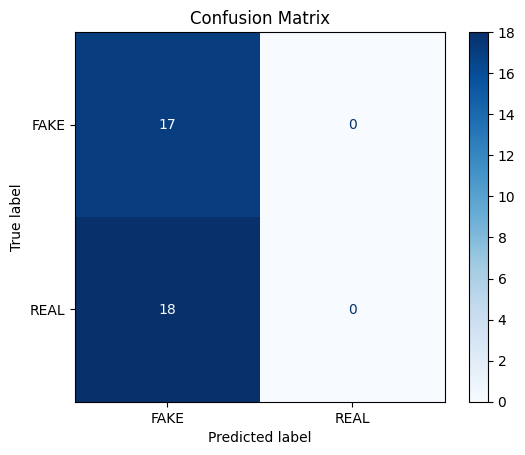

In [7]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 테스트 함수 정의
def test_model(model, test_loader, device):
    """
    모델 테스트 함수.
    Args:
        model: 학습된 모델
        test_loader: 테스트 데이터 로더
        device: 실행할 장치 (CPU 또는 GPU)
    Returns:
        metrics: 테스트 성능 지표 딕셔너리
        y_true, y_pred: 실제 레이블과 예측 레이블
    """
    model.eval()
    y_true, y_pred = [], []
    test_loss = 0.0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            preds = torch.sigmoid(outputs).cpu().numpy() > 0.5  # 예측값 이진화
            y_pred.extend(preds.flatten())
            y_true.extend(labels.cpu().numpy().flatten())

    test_loss /= len(test_loader)
    accuracy = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred, zero_division=0) * 100
    recall = recall_score(y_true, y_pred, zero_division=0) * 100
    f1 = f1_score(y_true, y_pred, zero_division=0) * 100

    metrics = {
        "Loss": test_loss,
        "Accuracy (%)": accuracy,
        "Precision (%)": precision,
        "Recall (%)": recall,
        "F1 Score (%)": f1,
    }

    return metrics, y_true, y_pred


# 혼동 행렬 시각화 함수
def plot_confusion_matrix(y_true, y_pred, class_names=["FAKE", "REAL"]):
    """
    혼동 행렬 시각화.
    Args:
        y_true (list): 실제 레이블
        y_pred (list): 예측 레이블
        class_names (list): 클래스 이름
    """
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()


test_dataset = ProcessedDataset(test_df, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

device = 'cuda'
# 모델 테스트: EfficientNet-B0
print("Testing EfficientNet-B0...")
efficientnet_metrics, y_true, y_pred = test_model(efficientnet_b0, test_loader, device)
print("EfficientNet-B0 Test Metrics:")
for metric, value in efficientnet_metrics.items():
    print(f"{metric}: {value:.2f}")

# 혼동 행렬 시각화: EfficientNet-B0
plot_confusion_matrix(y_true, y_pred)

# 모델 테스트: ConvNext Tiny
print("\nTesting ConvNext Tiny...")
convnext_metrics, y_true, y_pred = test_model(convnext_tiny, test_loader, device)
print("ConvNext Tiny Test Metrics:")
for metric, value in convnext_metrics.items():
    print(f"{metric}: {value:.2f}")

# 혼동 행렬 시각화: ConvNext Tiny
plot_confusion_matrix(y_true, y_pred)
